<a href="https://colab.research.google.com/github/dibdin/HIV-bioactivity-project/blob/main/Part_2_CCR5_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Repurposing cheap drugs for HIV**

original code credit: Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-09-24 16:38:33--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   130MB/s    in 0.6s    

2021-09-24 16:38:34 (130 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

## **Load bioactivity data**

In [ ]:
! wget https://raw.githubusercontent.com/dibdin/HIV-bioactivity-project/main/bioactivity_preprocessed_data_CCR5.csv

--2021-09-24 16:39:58--  https://raw.githubusercontent.com/dibdin/HIV-bioactivity-project/main/bioactivity_preprocessed_data_CCR5.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 284523 (278K) [text/plain]
Saving to: ‘bioactivity_preprocessed_data_CCR5.csv’

bioactivity_preproc 100%[===================>] 277.85K  --.-KB/s    in 0.03s   

2021-09-24 16:39:58 (8.42 MB/s) - ‘bioactivity_preprocessed_data_CCR5.csv’ saved [284523/284523]



In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('bioactivity_preprocessed_data_CCR5.csv')
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,335.0
1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,28.0
2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,10.0
3,CHEMBL83338,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,active,35.0
4,CHEMBL325357,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,15.0
...,...,...,...,...
2897,CHEMBL4465351,CC(C)N(C)[C@@H]1CC[C@H](N2CC[C@H](NC(=O)c3cccc...,intermediate,1570.0
2898,CHEMBL3577945,CCC[C@@H]1C[C@H](N(C)C(C)C)CC[C@@H]1N1CC[C@H](...,active,2.4
2899,CHEMBL4470701,CC(C)N(C)[C@@H]1CC[C@H](N2CC[C@H](Nc3ncnc4ccc(...,active,190.0
2900,CHEMBL4457723,CC(C)N(C)[C@@H]1CC[C@H](N2CC[C@H](Nc3ncnc4ccc(...,active,287.0


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,595.704,5.7114,0.0,9.0
1,518.618,4.6494,0.0,8.0
2,581.717,6.5817,0.0,7.0
3,557.181,5.2894,0.0,4.0
4,567.690,6.4076,0.0,7.0
...,...,...,...,...
2897,532.629,2.5574,1.0,5.0
2898,491.602,5.3390,1.0,5.0
2899,541.640,3.5835,1.0,7.0
2900,542.628,2.8405,2.0,7.0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,335.0
1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,28.0
2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,10.0
3,CHEMBL83338,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,active,35.0
4,CHEMBL325357,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,15.0
...,...,...,...,...
2897,CHEMBL4465351,CC(C)N(C)[C@@H]1CC[C@H](N2CC[C@H](NC(=O)c3cccc...,intermediate,1570.0
2898,CHEMBL3577945,CCC[C@@H]1C[C@H](N(C)C(C)C)CC[C@@H]1N1CC[C@H](...,active,2.4
2899,CHEMBL4470701,CC(C)N(C)[C@@H]1CC[C@H](N2CC[C@H](Nc3ncnc4ccc(...,active,190.0
2900,CHEMBL4457723,CC(C)N(C)[C@@H]1CC[C@H](N2CC[C@H](Nc3ncnc4ccc(...,active,287.0


Now, let's combine the 2 DataFrame

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,335.0,595.704,5.7114,0.0,9.0
1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,28.0,518.618,4.6494,0.0,8.0
2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,10.0,581.717,6.5817,0.0,7.0
3,CHEMBL83338,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,active,35.0,557.181,5.2894,0.0,4.0
4,CHEMBL325357,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,15.0,567.690,6.4076,0.0,7.0
...,...,...,...,...,...,...,...,...
2897,CHEMBL4465351,CC(C)N(C)[C@@H]1CC[C@H](N2CC[C@H](NC(=O)c3cccc...,intermediate,1570.0,532.629,2.5574,1.0,5.0
2898,CHEMBL3577945,CCC[C@@H]1C[C@H](N(C)C(C)C)CC[C@@H]1N1CC[C@H](...,active,2.4,491.602,5.3390,1.0,5.0
2899,CHEMBL4470701,CC(C)N(C)[C@@H]1CC[C@H](N2CC[C@H](Nc3ncnc4ccc(...,active,190.0,541.640,3.5835,1.0,7.0
2900,CHEMBL4457723,CC(C)N(C)[C@@H]1CC[C@H](N2CC[C@H](Nc3ncnc4ccc(...,active,287.0,542.628,2.8405,2.0,7.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [ ]:
df_combined.standard_value.describe()

count    2.902000e+03
mean     2.193984e+04
std      3.313789e+05
min      3.000000e-03
25%      3.100000e+00
50%      3.000000e+01
75%      4.490050e+02
max      1.000000e+07
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,595.704,5.7114,0.0,9.0,335.0
1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,518.618,4.6494,0.0,8.0,28.0
2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,581.717,6.5817,0.0,7.0,10.0
3,CHEMBL83338,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,active,557.181,5.2894,0.0,4.0,35.0
4,CHEMBL325357,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,567.690,6.4076,0.0,7.0,15.0
...,...,...,...,...,...,...,...,...
2897,CHEMBL4465351,CC(C)N(C)[C@@H]1CC[C@H](N2CC[C@H](NC(=O)c3cccc...,intermediate,532.629,2.5574,1.0,5.0,1570.0
2898,CHEMBL3577945,CCC[C@@H]1C[C@H](N(C)C(C)C)CC[C@@H]1N1CC[C@H](...,active,491.602,5.3390,1.0,5.0,2.4
2899,CHEMBL4470701,CC(C)N(C)[C@@H]1CC[C@H](N2CC[C@H](Nc3ncnc4ccc(...,active,541.640,3.5835,1.0,7.0,190.0
2900,CHEMBL4457723,CC(C)N(C)[C@@H]1CC[C@H](N2CC[C@H](Nc3ncnc4ccc(...,active,542.628,2.8405,2.0,7.0,287.0


In [ ]:
df_norm.standard_value_norm.describe()

count    2.902000e+03
mean     2.193984e+04
std      3.313789e+05
min      3.000000e-03
25%      3.100000e+00
50%      3.000000e+01
75%      4.490050e+02
max      1.000000e+07
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,595.704,5.7114,0.0,9.0,6.474955
1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,518.618,4.6494,0.0,8.0,7.552842
2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,581.717,6.5817,0.0,7.0,8.000000
3,CHEMBL83338,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,active,557.181,5.2894,0.0,4.0,7.455932
4,CHEMBL325357,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,567.690,6.4076,0.0,7.0,7.823909
...,...,...,...,...,...,...,...,...
2897,CHEMBL4465351,CC(C)N(C)[C@@H]1CC[C@H](N2CC[C@H](NC(=O)c3cccc...,intermediate,532.629,2.5574,1.0,5.0,5.804100
2898,CHEMBL3577945,CCC[C@@H]1C[C@H](N(C)C(C)C)CC[C@@H]1N1CC[C@H](...,active,491.602,5.3390,1.0,5.0,8.619789
2899,CHEMBL4470701,CC(C)N(C)[C@@H]1CC[C@H](N2CC[C@H](Nc3ncnc4ccc(...,active,541.640,3.5835,1.0,7.0,6.721246
2900,CHEMBL4457723,CC(C)N(C)[C@@H]1CC[C@H](N2CC[C@H](Nc3ncnc4ccc(...,active,542.628,2.8405,2.0,7.0,6.542118


In [ ]:
df_final.pIC50.describe()

count    2902.000000
mean        7.328233
std         1.501404
min         2.000000
25%         6.347751
50%         7.522879
75%         8.508638
max        11.522879
Name: pIC50, dtype: float64

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [ ]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,595.704,5.7114,0.0,9.0,6.474955
1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,518.618,4.6494,0.0,8.0,7.552842
2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,581.717,6.5817,0.0,7.0,8.000000
3,CHEMBL83338,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,active,557.181,5.2894,0.0,4.0,7.455932
4,CHEMBL325357,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,active,567.690,6.4076,0.0,7.0,7.823909
...,...,...,...,...,...,...,...,...
2894,CHEMBL4519152,CC(=O)C1=C(O)C(=O)N(c2ccc(Cl)cc2F)[C@@H]1C1CCCCC1,active,351.805,4.1757,1.0,3.0,6.153045
2898,CHEMBL3577945,CCC[C@@H]1C[C@H](N(C)C(C)C)CC[C@@H]1N1CC[C@H](...,active,491.602,5.3390,1.0,5.0,8.619789
2899,CHEMBL4470701,CC(C)N(C)[C@@H]1CC[C@H](N2CC[C@H](Nc3ncnc4ccc(...,active,541.640,3.5835,1.0,7.0,6.721246
2900,CHEMBL4457723,CC(C)N(C)[C@@H]1CC[C@H](N2CC[C@H](Nc3ncnc4ccc(...,active,542.628,2.8405,2.0,7.0,6.542118


---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

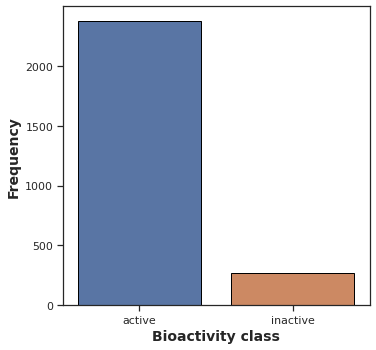

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**


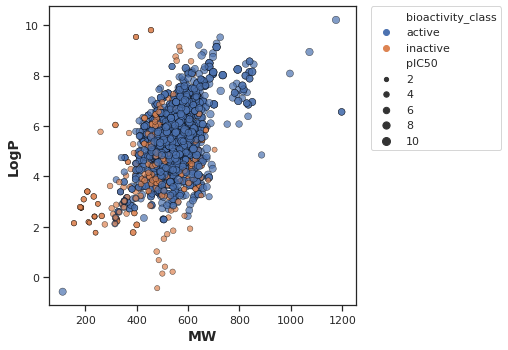

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

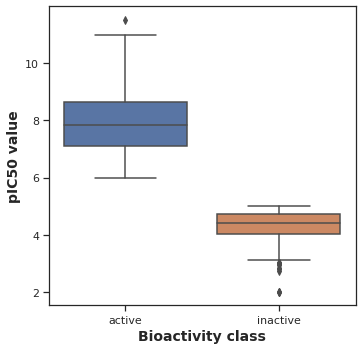

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,2.362941e-158,0.05,Different distribution (reject H0)


#### **MW**

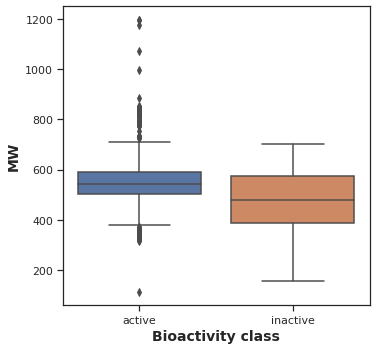

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,204968.0,2.120978e-21,0.05,Different distribution (reject H0)


#### **LogP**

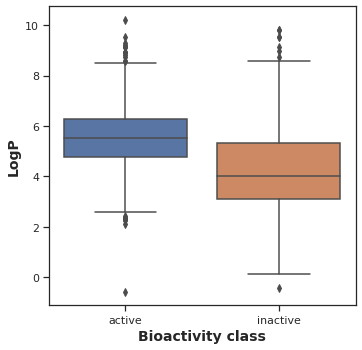

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,165505.0,1.228168e-37,0.05,Different distribution (reject H0)


#### **NumHDonors**

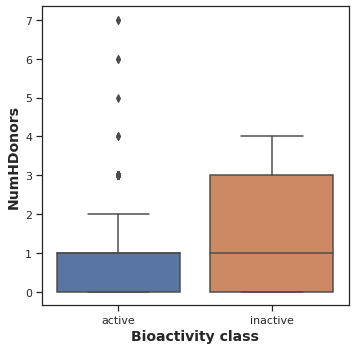

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,217180.0,3.625068e-20,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

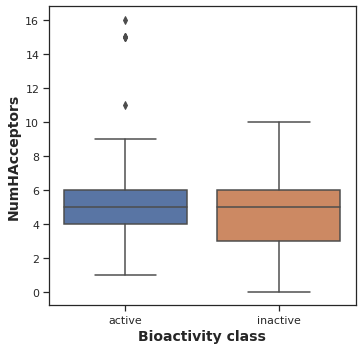

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,304149.5,0.146058,0.05,Same distribution (fail to reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors, only NumHAcceptors exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and LogP) shows ***statistically significant difference*** between **actives** and **inactives**.

# Download CSV of df_combined (bioactivity data + lipinski + pIC50)

In [ ]:
! ls -l

total 85596
-rw-r--r-- 1 root root   427296 Sep 24 17:34 bioactivity_CCR5_lipinski_pIC50
-rw-r--r-- 1 root root   440697 Sep 24 17:38 bioactivity_CCR5_lipinski_pIC50_combined.csv
-rw-r--r-- 1 root root   298204 Sep 24 17:35 bioactivity_CCR5_lipinski_pIC50.csv
-rw-r--r-- 1 root root   284523 Sep 24 16:39 bioactivity_preprocessed_data_CCR5.csv
drwx------ 5 root root     4096 Sep 24 17:38 gdrive
-rw-r--r-- 1 root root      125 Sep 24 16:41 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      122 Sep 24 16:41 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      134 Sep 24 16:41 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      131 Sep 24 16:41 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root      121 Sep 24 16:41 mannwhitneyu_pIC50.csv
-rwxr-xr-x 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh
-rw-r--r-- 1 root root    13118 Sep 24 16:40 plot_bioactivity_class.pdf
-rw-r--r-- 1 root root    14910 Sep 24 16:40 plot_ic50.pdf
-rw-r--r-- 1 root root    14019 Sep 24 16

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
df_2class.to_csv('bioactivity_CCR5_lipinski_pIC50_combined.csv')
! cp bioactivity_CCR5_lipinski_pIC50_combined.csv "/content/gdrive/My Drive/Colab Notebooks/dataHIV"

In [ ]:
! ls "/content/gdrive/My Drive/Colab Notebooks/dataHIV"

bioactivity_CCR5_lipinski_pIC50_combined.csv
bioactivity_data_CCR5.csv
bioactivity_preprocessed_data_CCR5.csv


## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: plot_MW_vs_LogP.pdf (deflated 2%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: bioactivity_preprocessed_data_CCR5.csv (deflated 88%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: plot_MW.pdf (deflated 37%)
  adding: plot_bioactivity_class.pdf (deflated 39%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: plot_ic50.pdf (deflated 37%)
